### WeRateDogs Project - Wrangling and Analyzing Twitter Data. 

### Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. My goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Gathering Data

In [2]:
#Importing dataset 
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#The dog image prediction file is hosted on Udacity's server and should be downloaded programmatically 
import requests 
import os 

In [4]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)
response
with  open(os.path.join(folder_name,
                       url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [7]:
images = pd.read_table('image_predictions/image-predictions.tsv',sep='\t')

In [8]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
#Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'gxHT1JvNuDywwhP2QgDWfDJB8'
consumer_secret = 'L7Kbh1HmoTjiNrevYFIp92S9PW05IAXByXdjmSs3fAb5yI6Fiv'
access_token = '1095040910767738881-XFlZtikZ6lBMuiWKRMSnSvPZrjZCy5'
access_secret = 'q4Nt9d8olX7ikNfdfp6ocGHuaWJ9WZYsIZe5Jm1bxC0kb'

auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
tweet_ids = df.tweet_id.values

count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt','w') as outfile:
    #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [9]:
tweet_df = pd.read_json('tweet_json.txt',lines=True)

In [10]:
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37935,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8286,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32569,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6118,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24529,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4054,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41273,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8424,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39468,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9129,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Assesing data

My goal is to detect and document at least 8 quality issues and 2 tidiness issues. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [13]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Quality 

###### df table

- Retweets should be deleted: they are not original tweets. All rows containing values in retweeted_status_id should be removed
- Names are misspelled, will need to replace them with "None". 
- Drop columns that are not necessary for further analysing. 
- Convert "tweet_id" from number to a string. 
- Convert date and time columns to datatime. 
- Convert "rating" column into float.

##### tweet_df table

- Retweets should be removed: delete all rows that contain any values in retweeted_status 
- Rename the 'id' column to 'tweet_id' to match two other datafreames. 
- Drop columns that are not necessary for further analysing. 
- Convert "id" column into string.  
- Date and time columns should be separated into two columns. 
- Reindex tweet_df using tweet_id. 

##### images table

- Capitalize first letter of each word in p1, p2, p3 columns. 
- Remove _ in p1, p2, p3 columns.

#### Tidyness 

##### df table

- Create separate columns for date and time.
- Combine doggo, floofer, pupper, puppo into one column "state". 

#### All tables

Perform an inner join to connect all three tables

### Cleaning data

In [11]:
df_clean = df.copy()
tweet_df_clean = tweet_df.copy()
images_clean = images.copy()

##### Cleaning df_clean

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Define

Removing rows that contains values in retweeted_status_id.

##### Code

In [36]:
df_clean[df_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [12]:
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()==True].index,inplace=True)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Define

Replacing misspelled values in "name" column. 

##### Code 

In [13]:
df_clean.loc[:,'name'].replace('a','None',inplace=True)
df_clean.loc[:,'name'].replace('an','None',inplace=True)
df_clean.loc[:,'name'].replace('the','None',inplace=True)
df_clean.loc[:,'name'].replace('quite','None',inplace=True)
df_clean.loc[:,'name'].replace('such','None',inplace=True)

##### Test

In [12]:
df_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

##### Define

Convert column "tweet_id" from integer to string, convert column "rating_numerator" and "rating_denominator" into a float.

##### Code

In [14]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

##### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(6), object(11)
me

##### Define 

Combine doggo, floofer, pupper, puppo into one column "state".

##### Code

In [15]:
df_clean['stage'] = df_clean[['doggo','floofer','pupper','puppo']].apply(lambda x:''.join(x),axis=1)

In [16]:
df_clean['stage'].value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [17]:
df_clean.loc[:,'stage'].replace('NoneNoneNoneNone','None',inplace=True)
df_clean.loc[:,'stage'].replace('NoneNonepupperNone','pupper',inplace=True)
df_clean.loc[:,'stage'].replace('doggoNoneNoneNone','doggo',inplace=True)
df_clean.loc[:,'stage'].replace('NoneNoneNonepuppo','puppo',inplace=True)
df_clean.loc[:,'stage'].replace('doggoNonepupperNone','doggopupper',inplace=True)
df_clean.loc[:,'stage'].replace('NoneflooferNoneNone','floofer',inplace=True)
df_clean.loc[:,'stage'].replace('doggoflooferNoneNone','doggofloofer',inplace=True)
df_clean.loc[:,'stage'].replace('doggoNoneNonepuppo','doggopuppo',inplace=True)

In [16]:
df_clean.stage.value_counts()

None            1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [18]:
#Handle multiple stages
df_clean.loc[df_clean.stage == 'doggopupper','stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#Handle missing values
df_clean.loc[df_clean.stage == '', 'stage'] = np.nan

In [19]:
df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

##### Test

In [20]:
df_clean['stage'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
stage                         2175 non-null object
dtypes: float64(6), object(8)
memory usage: 334.9+ KB


##### Define

Create separate columns for date and time by separating timestamp column and converting into datetime format.

##### Code

In [20]:
from datetime import datetime

df_clean['date'] = pd.to_datetime(df_clean['timestamp']).dt.date
df_clean['time'] = pd.to_datetime(df_clean['timestamp']).dt.time

##### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
stage                         2175 non-null object
date                          2175 non-null object
time                          2175 non-null object
dtypes: float64(6), object(10)
memory usage: 288.9+ KB


##### Define 

Creating a column rating by calculating value of rating numberator divided by the rating of denominator. 

##### Code

In [21]:
df_clean['rating'] = df_clean['rating_numerator'] / df_clean['rating_denominator']

##### Test

In [24]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,date,time,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,2017-08-01,16:23:56,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,2017-08-01,00:17:27,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,2017-07-31,00:18:03,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,2017-07-30,15:58:51,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,2017-07-29,16:00:24,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,2017-07-29,00:08:17,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,2017-07-28,16:27:12,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,2017-07-28,00:22:40,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,2017-07-27,16:25:51,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,2017-07-26,15:59:51,1.4


##### Define 

Removing all unnecessary columns

##### Code

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
rating                2175 non-null float64
dtypes: float64(3), object(6)
memory usage: 249.9+ KB


In [22]:
df_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','timestamp','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1, inplace=True)

##### Test

In [23]:
df_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,date,time,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,2017-08-01,16:23:56,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,2017-08-01,00:17:27,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,2017-07-31,00:18:03,1.2
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,2017-07-30,15:58:51,1.3
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,2017-07-29,16:00:24,1.2


#### Tweet_df cleaning

In [45]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

##### Define

Rename the "id" column to "tweet_id" column to match two other dataframes. 

##### Code

In [24]:
tweet_df_clean = tweet_df_clean.rename(columns={'id':'tweet_id'})

##### Test

In [25]:
tweet_df_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37935,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8286,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32569,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6118,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24529,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4054,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41273,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8424,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39468,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9129,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


##### Define 

Create separate columns for date and time by separating timestamp column and converting into datetime format.

##### Code

In [26]:
tweet_df_clean['date'] = pd.to_datetime(tweet_df_clean['created_at']).dt.date
tweet_df_clean['time'] = pd.to_datetime(tweet_df_clean['created_at']).dt.time

##### Test

In [24]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 34 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
tweet_id                         2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

##### Define 

Convert tweet_id column into string format. 

##### Code

In [27]:
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)

##### Test

In [26]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 34 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
tweet_id                         2340 non-null object
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 

##### Define 

Remove all retweeted rows, by removing all rows which includes any values in retweeted_status column. Retweeted tweets are not original tweets

##### Code

In [28]:
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True].index,inplace=True)

##### Test

In [50]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2339
Data columns (total 34 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2173 non-null datetime64[ns]
display_text_range               2173 non-null object
entities                         2173 non-null object
extended_entities                1992 non-null object
favorite_count                   2173 non-null int64
favorited                        2173 non-null bool
full_text                        2173 non-null object
geo                              0 non-null float64
tweet_id                         2173 non-null object
id_str                           2173 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 

##### Define 

Remove all unnecessary columns 

##### Code

In [29]:
tweet_df_clean.drop(['contributors','coordinates','created_at','display_text_range','entities','extended_entities','favorited','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink','retweeted','retweeted_status','source','truncated'],axis=1, inplace=True)

##### Test

tweet_df_clean.info()

In [53]:
tweet_df_clean.columns

Index(['favorite_count', 'full_text', 'tweet_id', 'retweet_count', 'user',
       'date', 'time'],
      dtype='object')

#### Images dataframe

In [26]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define

Capitalize first letter of each word in columns p1, p2, p3. 

##### Code

In [30]:
images_clean.p1 = images_clean.p1.str.capitalize()

In [31]:
images_clean.p2 = images_clean.p2.str.capitalize()

In [32]:
images_clean.p3 = images_clean.p3.str.capitalize()

##### Test

In [33]:
images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


##### Define 

Remove "_" in columns p1, p2, p3.

#### Code

In [33]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')

In [34]:
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')

In [35]:
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

##### Test

In [38]:
images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True


##### Define 

Perform inner join to connect three tables 

##### Code

In [36]:
all_columns = pd.concat([df_clean, tweet_df_clean, images_clean], axis=1)

In [37]:
all_columns.to_csv('twitter_archive_master.csv', index=False)

##### Test

In [40]:
all_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
rating                2175 non-null float64
favorite_count        2173 non-null float64
full_text             2173 non-null object
tweet_id              2173 non-null object
retweet_count         2173 non-null float64
user                  2173 non-null object
date                  2173 non-null object
time                  2173 non-null object
tweet_id              2075 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075

### Analyzing and Visualizing 

Now, after cleaning and trimming data, I will ask three questions and compute statistics and create visualisations. 

##### Most popular dog names in the dataframe?

In [41]:
# Counting all values on name column
all_columns['name'].value_counts()

None         753
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Oscar          6
Bella          6
Stanley        6
Jax            6
Bo             6
Koda           6
Bailey         6
Bentley        5
Leo            5
Buddy          5
Scout          5
Milo           5
Rusty          5
Dave           5
Chester        5
Louis          5
Scooter        4
Phil           4
            ... 
Gordon         1
Fido           1
Smiley         1
Dug            1
Coopson        1
Leela          1
Wiggles        1
Rumpole        1
Dante          1
Pinot          1
Jaycob         1
Comet          1
Shaggy         1
Lassie         1
Bertson        1
Quinn          1
Yoda           1
Mingus         1
Covach         1
Lilly          1
Mosby          1
Pipsy          1
Billy          1
Grizzwald      1
Spencer        1
Einstein       1
Batdog         1
Trevith       

##### 753 dog names are unknown. Top dogs names include: Lucy, Charlie, Oliver, Cooper, Penny, Tucker, Lola, Sadie, Winston, Toby, Daisy. #####

In [42]:
ranking = all_columns['name'].value_counts()

Text(0,0.5,'Count of names')

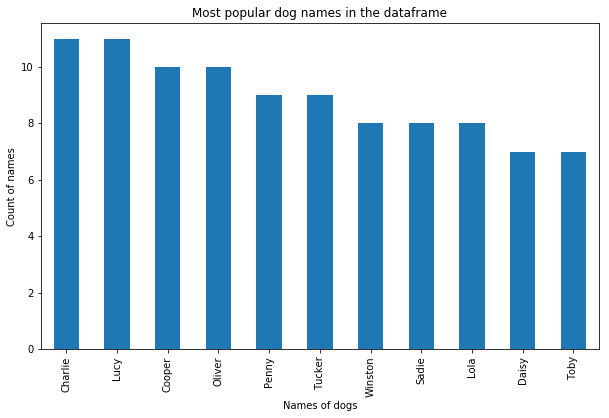

In [43]:
#Excluding unknown names 
ranking[1:12].plot(kind='bar', figsize=(10,6))
plt.title('Most popular dog names in the dataframe')
plt.xlabel('Names of dogs')
plt.ylabel('Count of names')

##### Insights on dog stages. 

In [50]:
all_columns.groupby('stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
None,1831.0,inf,NaN,0.0,1.000,1.1,1.2,inf
doggo,75.0,1.185333,0.143030,0.8,1.100,1.2,1.3,1.400000
"doggo, pupper",10.0,1.110000,0.228279,0.5,1.125,1.2,1.2,1.300000
"doggo,floofer",1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.100000
"doggo,puppo",1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.300000
floofer,9.0,1.188889,0.105409,1.0,1.100,1.2,1.3,1.300000
pupper,224.0,1.080804,0.202534,0.3,1.000,1.1,1.2,2.700000
puppo,24.0,1.204167,0.126763,0.9,1.175,1.2,1.3,1.400000


Highest count of dog stages in the dataframe is puppers. Highest average rating 1.88889 is given for floofers. One of the puppers recieved a highest rating 2.7. 

##### Comparison of favorites and retweet counts

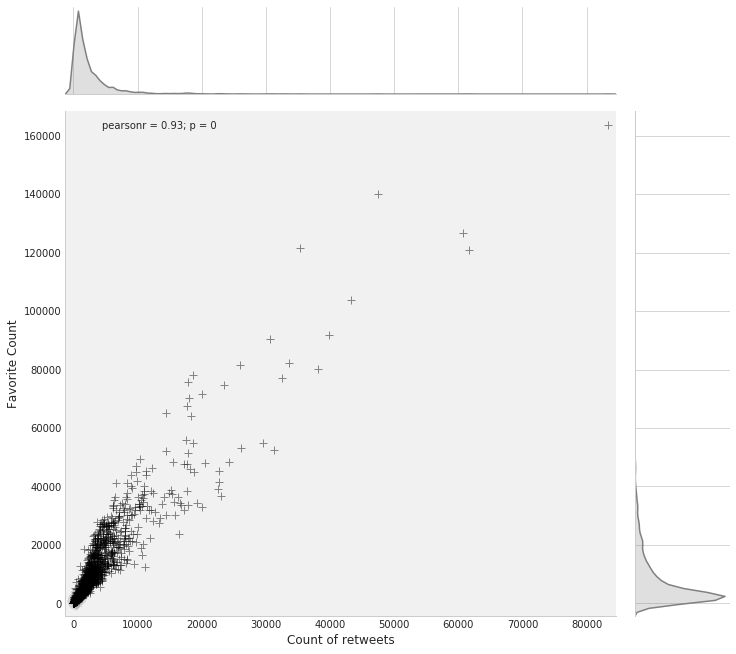

In [45]:
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=all_columns, 
                  color="grey",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Count of retweets", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)



According to the scatterplot above, there is a strong correlation between count of retweets and favorite count. 

##### Count of yearly retweets 

In [80]:
#Creating a new column year based on date column 
all_columns['date'] = pd.to_datetime(all_columns['date'])
all_columns['year'] = all_columns['date'].dt.year

In [82]:
#Counting number of retweets every year
year_tweets = all_columns.groupby('year').retweet_count.count()
year_tweets

year
2015.0     670
2016.0    1016
2017.0     340
Name: retweet_count, dtype: int64

Looks like number of retweets was not increasing every year. In 2017 it decreased to 340, which can indicate lower popularity of the account. 

##### Yearly average rating numerator 

In [89]:
yearly_numerator = all_columns.groupby('year').rating_numerator.mean()

In [90]:
yearly_numerator

year
2015.0    10.235465
2016.0    13.325368
2017.0    18.052632
Name: rating_numerator, dtype: float64

In case of rating numerator, the average number has been increasing every year. In 2017 it reached to 18.05. 